In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

dados_2019 = pd.read_csv("../dados/obitos-2019.csv")
dados_2020 = pd.read_csv("../dados/obitos-2020.csv")

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12382, 6)
2020 (14903, 6)


In [2]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [3]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
13077,SP,OUTRAS,OUTROS_SERVICOS_SAUDE,90 - 99,M,278
1521,PR,PNEUMONIA,HOSPITAL,10 - 19,F,8
13895,RR,COVID,HOSPITAL,> 100,F,3
5428,AP,OUTRAS,VIA_PUBLICA,50 - 59,M,1
7654,PB,COVID,OUTRO,60 - 69,M,1


In [6]:
dados_2019['uf'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [7]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [9]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3846
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2063
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [10]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3798
INSUFICIENCIA_RESPIRATORIA    2333
PNEUMONIA                     2212
COVID                         2107
SEPTICEMIA                    2028
INDETERMINADA                 1345
SRAG                          1080
Name: tipo_doenca, dtype: int64

## Desafio 01: Acessar o portal e verificar como são classificados os dados

## Desafio 02: Corrigir o erro do Thiago na contagem de casos 

In [16]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()['total']
total_obitos_2019

tipo_doenca
COVID                              1
INDETERMINADA                   6988
INSUFICIENCIA_RESPIRATORIA    100549
OUTRAS                        660364
PNEUMONIA                     226257
SEPTICEMIA                    175474
SRAG                            1498
Name: total, dtype: int64

In [17]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()['total']
total_obitos_2020

tipo_doenca
COVID                         195392
INDETERMINADA                   9698
INSUFICIENCIA_RESPIRATORIA     98800
OUTRAS                        688989
PNEUMONIA                     181843
SEPTICEMIA                    162618
SRAG                           16539
Name: total, dtype: int64

## Desafio 02: Fim

In [19]:
proporcao = round(total_obitos_2020 / total_obitos_2019,2)
proporcao

tipo_doenca
COVID                         195392.00
INDETERMINADA                      1.39
INSUFICIENCIA_RESPIRATORIA         0.98
OUTRAS                             1.04
PNEUMONIA                          0.80
SEPTICEMIA                         0.93
SRAG                              11.04
Name: total, dtype: float64

In [27]:
def grafico_comparativo(causa):
    
    total_2019 = dados_2019.groupby('tipo_doenca').sum()['total']
    total_2020 = dados_2020.groupby('tipo_doenca').sum()['total']

    lista = [total_2019.loc[causa], total_2020.loc[causa]]
    dados = pd.DataFrame({'Total': lista,
                        'Ano':[2019,2020]})
    plt.figure(figsize=(10,8))
    plt.title(f'Obitos por {causa}')
    sns.barplot(data=dados, x='Ano', y='Total')
    plt.show()
    


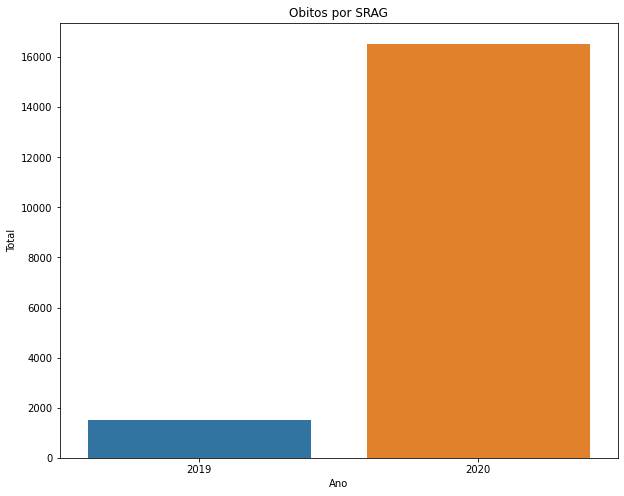

In [28]:
grafico_comparativo('SRAG')

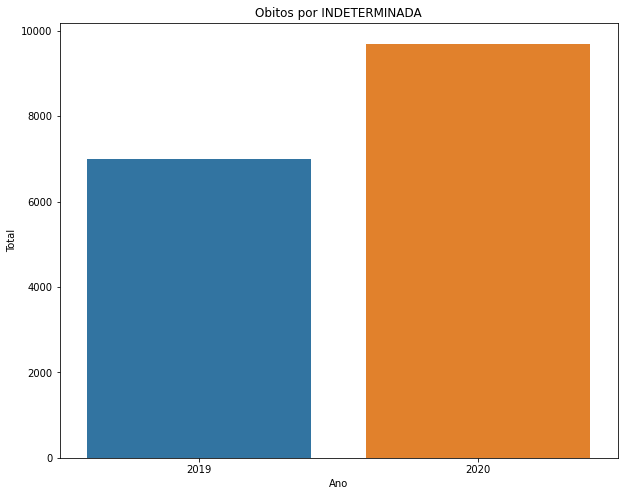

In [30]:
grafico_comparativo('INDETERMINADA')